In [43]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [44]:
df = pd.read_csv("./Data/Top_250_films.csv")

In [45]:
df.head()

,Unnamed: 0,Title,Rating,Genres
0,tt0111161,The Shawshank Redemption,9.3,['Drama']
1,tt0068646,The Godfather,9.2,"['Crime', 'Drama']"
2,tt0468569,The Dark Knight,9.0,"['Action', 'Crime', 'Drama']"
3,tt0071562,The Godfather Part II,9.0,"['Crime', 'Drama']"
4,tt0050083,12 Angry Men,9.0,"['Crime', 'Drama']"


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  250 non-null    object 
 1   Title       250 non-null    object 
 2   Rating      250 non-null    float64
 3   Genres      250 non-null    object 
dtypes: float64(1), object(3)
memory usage: 7.9+ KB


In [47]:
df_explode = df.explode(column="Genres")
one_hot = pd.get_dummies(df_explode["Genres"])

In [48]:
df.explode("Genres")

,Unnamed: 0,Title,Rating,Genres
0,tt0111161,The Shawshank Redemption,9.3,['Drama']
1,tt0068646,The Godfather,9.2,"['Crime', 'Drama']"
2,tt0468569,The Dark Knight,9.0,"['Action', 'Crime', 'Drama']"
3,tt0071562,The Godfather Part II,9.0,"['Crime', 'Drama']"
4,tt0050083,12 Angry Men,9.0,"['Crime', 'Drama']"
...,...,...,...,...
245,tt0071411,Dersu Uzala,8.2,"['Adventure', 'Biography', 'Drama']"
246,tt1454029,The Help,8.1,['Drama']
247,tt0103639,Aladdin,8.0,"['Animation', 'Adventure', 'Comedy']"
248,tt0083987,Gandhi,8.0,"['Biography', 'Drama', 'History']"


In [49]:
dummy_df = df.join(one_hot)
dummy_df.drop(columns="Genres",inplace=True)

In [50]:
dummy_df.head()

,Unnamed: 0,Title,Rating,"['Action', 'Adventure', 'Comedy']","['Action', 'Adventure', 'Drama']","['Action', 'Adventure', 'Fantasy']","['Action', 'Adventure', 'Mystery']","['Action', 'Adventure', 'Sci-Fi']","['Action', 'Adventure']","['Action', 'Biography', 'Drama']",...,"['Drama', 'Western']",['Drama'],"['Film-Noir', 'Mystery', 'Thriller']","['Horror', 'Mystery', 'Sci-Fi']","['Horror', 'Mystery', 'Thriller']","['Horror', 'Sci-Fi']",['Horror'],"['Mystery', 'Romance', 'Thriller']","['Mystery', 'Thriller']",['Western']
0,tt0111161,The Shawshank Redemption,9.3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,tt0068646,The Godfather,9.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0468569,The Dark Knight,9.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0071562,The Godfather Part II,9.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0050083,12 Angry Men,9.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/home/david/Documents/Movie-Recommender/.venv/lib64/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


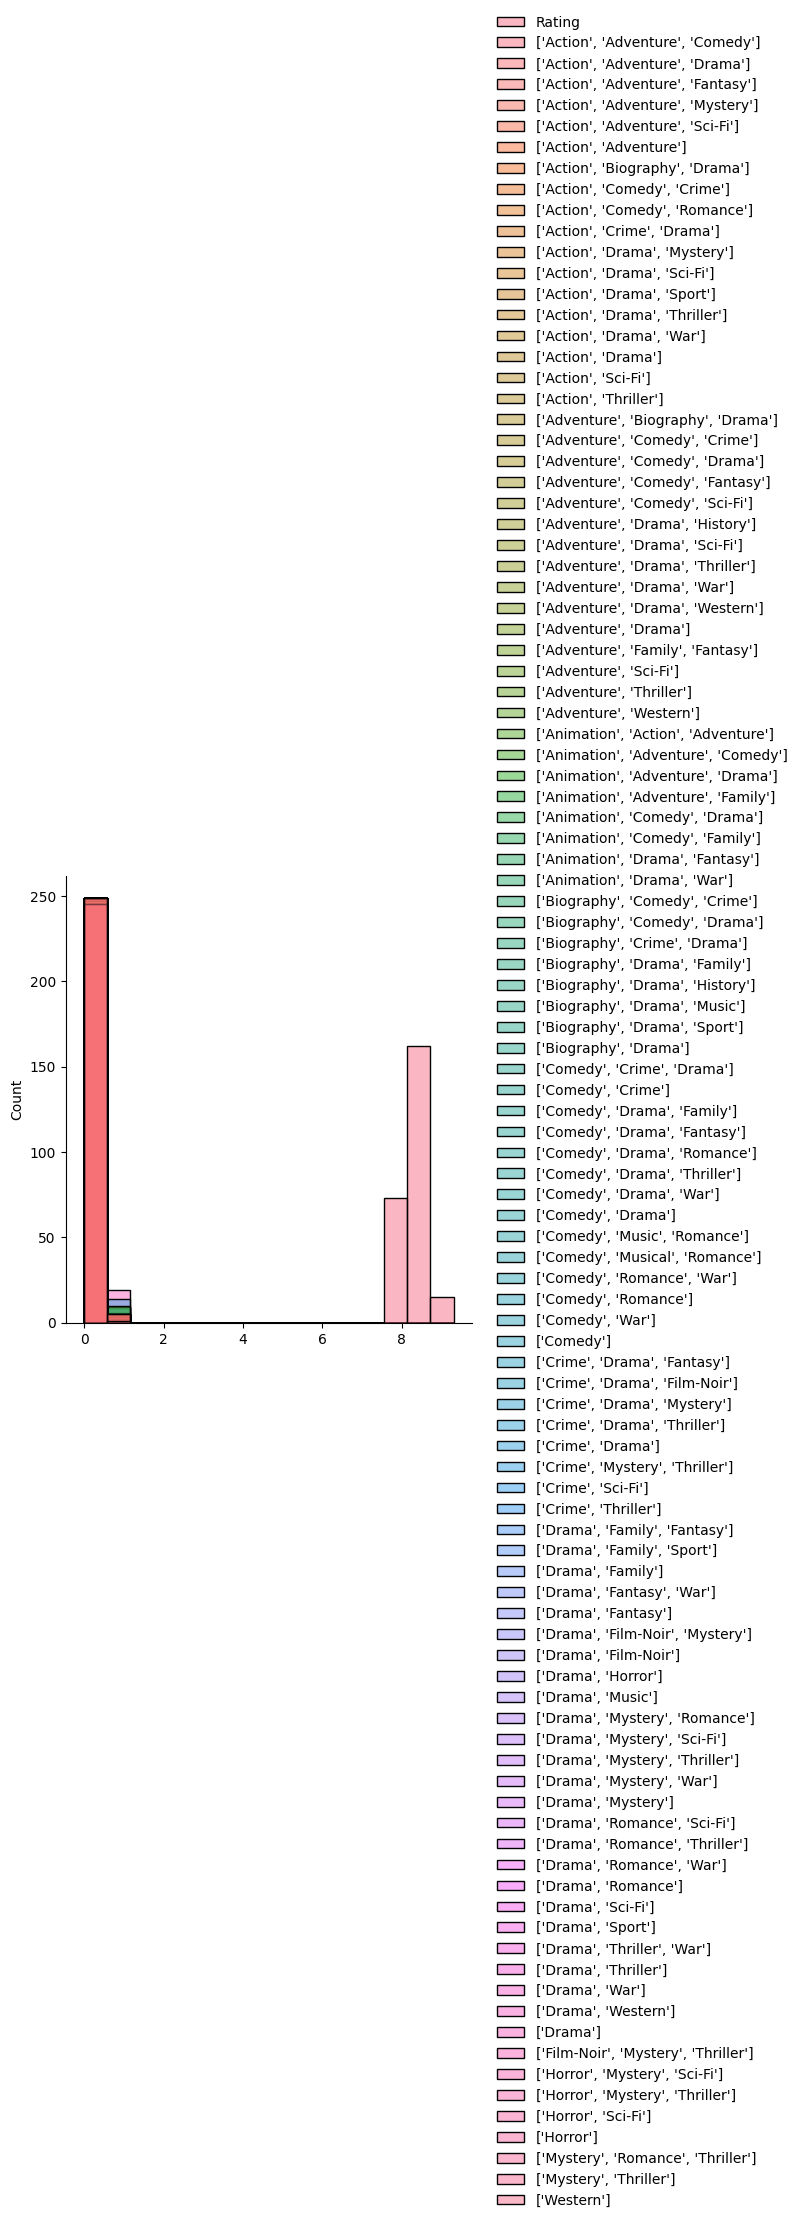

In [51]:
sns.displot(dummy_df.iloc[:, 2:])